# PyTorch Layer 이해하기

# 예제 불러오기

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1)

In [5]:
image, label = next(iter(train_loader))

In [6]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

Text(0.5, 1.0, 'tensor([5])')

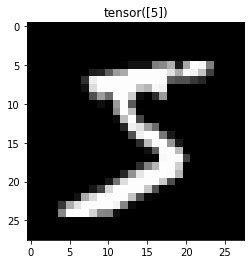

In [7]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.title(label)

# 각 Layer별 설명

- Network 쌓기 위한 준비

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Convolution

- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수  
- kernel_size: 만들고 싶은 kernel(weights)의 사이즈

In [9]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cuda'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 시각화를 위해 slice하고 numpy화

In [11]:
weight = layer.weight
weight

Parameter containing:
tensor([[[[ 1.5857e-01, -4.2297e-03, -5.0621e-02,  2.0960e-02, -1.2844e-01],
          [-8.7020e-02,  4.2337e-02, -1.0373e-01,  3.6739e-02, -1.0404e-01],
          [ 1.2746e-01, -9.7392e-02, -6.9317e-02, -1.3286e-01, -1.8931e-01],
          [ 5.8292e-02,  9.1856e-02, -1.2598e-01, -6.6280e-03, -1.6042e-01],
          [-1.7900e-02,  1.1983e-01,  1.6809e-01, -1.0183e-01, -9.3740e-02]]],


        [[[-1.5362e-02,  6.6622e-02, -1.9568e-01,  9.8337e-02,  1.6667e-01],
          [-1.5394e-01,  1.7430e-01, -3.3139e-02,  5.8050e-02, -1.2109e-01],
          [ 1.5411e-01,  1.5660e-01,  7.0169e-02, -7.2910e-02,  1.0976e-03],
          [ 1.0437e-01,  1.5117e-01, -1.7014e-01,  1.9140e-01, -1.5375e-01],
          [ 4.8114e-02,  1.0126e-01, -7.6439e-02,  7.1796e-02,  6.5728e-04]]],


        [[[-1.4659e-01,  1.0750e-01,  1.2078e-01, -6.2365e-02,  7.2926e-02],
          [-1.0744e-01,  1.7785e-01, -9.6402e-02, -1.8442e-01,  1.6050e-01],
          [ 1.9805e-01, -1.5545e-01,  1.2602e-

In [12]:
weight.shape

torch.Size([20, 1, 5, 5])

- 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼 수 없음
- detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [13]:
weight = weight.detach().cpu().numpy()
weight

array([[[[ 1.58566639e-01, -4.22969460e-03, -5.06208688e-02,
           2.09601671e-02, -1.28436774e-01],
         [-8.70198235e-02,  4.23369110e-02, -1.03733614e-01,
           3.67386341e-02, -1.04037739e-01],
         [ 1.27455696e-01, -9.73915607e-02, -6.93174601e-02,
          -1.32863641e-01, -1.89307496e-01],
         [ 5.82918078e-02,  9.18560475e-02, -1.25978768e-01,
          -6.62799180e-03, -1.60419196e-01],
         [-1.78996027e-02,  1.19830266e-01,  1.68090746e-01,
          -1.01832248e-01, -9.37398896e-02]]],


       [[[-1.53624117e-02,  6.66216761e-02, -1.95684060e-01,
           9.83371884e-02,  1.66666433e-01],
         [-1.53943941e-01,  1.74296543e-01, -3.31389159e-02,
           5.80500215e-02, -1.21087722e-01],
         [ 1.54108360e-01,  1.56600997e-01,  7.01690167e-02,
          -7.29097575e-02,  1.09760463e-03],
         [ 1.04374513e-01,  1.51170835e-01, -1.70141742e-01,
           1.91403165e-01, -1.53747082e-01],
         [ 4.81135398e-02,  1.01260260e-01

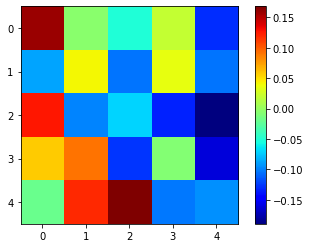

In [14]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()

- output 시각화 준비를 위해 numpy화

In [15]:
output_data = layer(image.to(device))

In [16]:
output_data = output_data.data

In [17]:
output= output_data.cpu().numpy()

In [18]:
output.shape

(1, 20, 24, 24)

- Input으로 들어간 이미지 numpy화 

In [19]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

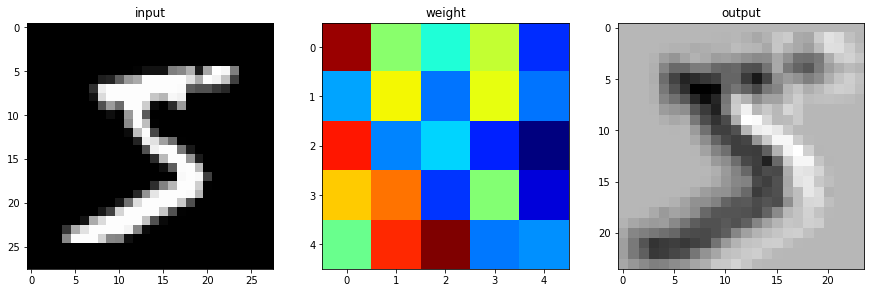

In [20]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('input')
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('output')
plt.imshow(output[0, 0, :, :], 'gray')

### Pooling

input을 먼저 앞에 넣고, 뒤에 kernel 사이즈와 stride를 순서대로 넣음

In [21]:
image.shape

torch.Size([1, 1, 28, 28])

In [22]:
pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()가 가능

In [23]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [24]:
image.shape

torch.Size([1, 1, 28, 28])

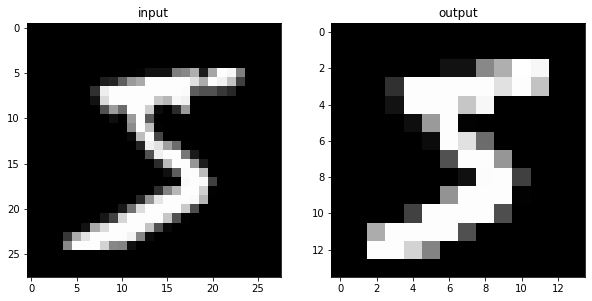

In [25]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('input')
plt.imshow(np.squeeze(image_arr), 'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(np.squeeze(pool_arr), 'gray')

### Linear

nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함

In [26]:
image.shape

torch.Size([1, 1, 28, 28])

In [27]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [28]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [29]:
lin

tensor([[-0.1337, -0.2347, -0.1447,  0.1962,  0.0928,  0.0582, -0.0382, -0.2526,
          0.1013,  0.3348]], grad_fn=<AddmmBackward>)

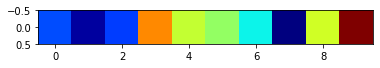

In [30]:
plt.imshow(lin.detach().cpu().numpy(), 'jet')

### Softmax

결과를 numpy로 꺼내기 위해선 weight가 담긴 Linear에 weight를 꺼줘야함

In [31]:
with torch.no_grad():
    flatten = image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [32]:
softmax

tensor([[0.1252, 0.0849, 0.0830, 0.0890, 0.1138, 0.1024, 0.0933, 0.1078, 0.1145,
         0.0861]])

In [35]:
np.sum(softmax.cpu().numpy())

0.99999994

# Layer 쌓기

예제 출처: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id23

nn 과 nn.functional의 차이점
- nn은 학습 파라미터가 담긴 것 
- nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # Feature extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
#         print(x.shape)
        # Fully connected (classification)
        x = x.view(-1, 50 * 4* 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

- Image를 Model에 넣어서 결과 확인

In [43]:
model = Net()

In [44]:
model.forward(image)

tensor([[-2.2808, -2.2426, -2.3590, -2.3537, -2.2787, -2.2300, -2.2831, -2.3256,
         -2.3258, -2.3566]], grad_fn=<LogSoftmaxBackward>)

In [46]:
model.conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))